In [3]:
import numpy as np
import pandas as pd
import os

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Setup stop words
stop_words = set(stopwords.words('english'))

# Your code continues...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df=pd.read_csv('/content/deceptive-opinion.csv')

In [9]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [10]:
df.isnull().sum()

,0
deceptive,0
hotel,0
polarity,0
source,0
text,0


<Axes: xlabel='deceptive', ylabel='count'>

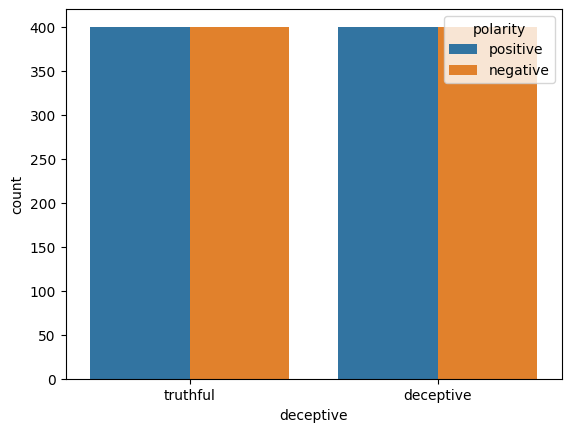

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

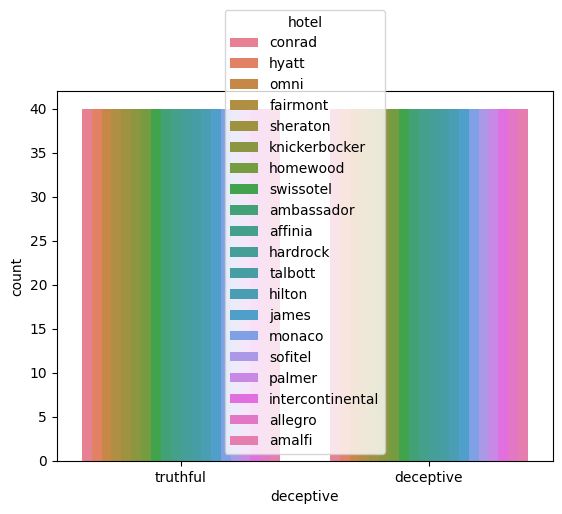

In [12]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)

In [13]:
df=df.drop(['hotel'],axis=1)

In [14]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [15]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df['complete_text']=df['source'] + ' ' +df['text']

In [17]:
df['complete_text']=df['complete_text'].apply(text_cleaning)

In [18]:
df.shape

(1600, 5)

In [19]:
df = df.drop_duplicates('complete_text')

In [20]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...,tripadvisor stayed one night getaway family th...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,tripadvisor triple rate upgrade view room less...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...,tripadvisor comes little late 'm finally catch...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,tripadvisor omni chicago really delivers front...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...,tripadvisor asked high floor away elevator got...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...,mturk problems started booked intercontinental...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,mturk amalfi hotel beautiful website interior ...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,mturk intercontinental chicago magnificent mil...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i...","mturk palmer house hilton , looks good picture..."


In [21]:
stemmer = PorterStemmer()

In [22]:
df['complete_text'] = df['complete_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

<ipython-input-22-707e94938359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complete_text'] = df['complete_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [23]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...,tripadvisor stay one night getaway famili thur...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,tripadvisor tripl rate upgrad view room less $...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...,tripadvisor come littl late 'm final catch rev...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"tripadvisor omni chicago realli deliv front , ..."
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...,tripadvisor ask high floor away elev got . roo...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...,mturk problem start book intercontinent chicag...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,mturk amalfi hotel beauti websit interior deco...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,mturk intercontinent chicago magnific mile out...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i...","mturk palmer hous hilton , look good pictur , ..."


In [24]:
df['complete_text'] = df['complete_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

<ipython-input-24-707e94938359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complete_text'] = df['complete_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [25]:
df

,deceptive,polarity,source,text,complete_text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...,tripadvisor stay one night getaway famili thur...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,tripadvisor tripl rate upgrad view room less $...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...,tripadvisor come littl late 'm final catch rev...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,"tripadvisor omni chicago realli deliv front , ..."
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...,tripadvisor ask high floor away elev got . roo...
...,...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...,mturk problem start book intercontin chicago o...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,mturk amalfi hotel beauti websit interior deco...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,mturk intercontin chicago magnif mile outsid h...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i...","mturk palmer hou hilton , look good pictur , o..."


In [27]:
df.shape

(1596, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   deceptive      1596 non-null   object
 1   polarity       1596 non-null   object
 2   source         1596 non-null   object
 3   text           1596 non-null   object
 4   complete_text  1596 non-null   object
dtypes: object(5)
memory usage: 74.8+ KB


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2)).fit(df['complete_text'])

In [31]:
X = df['complete_text']
Y = df['deceptive']
X = vect.transform(X)
le=LabelEncoder()
Y=le.fit_transform(Y)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (1276, 79636)
Size of y_train: (1276,)
Size of x_test: (320, 79636)
Size of y_test: (320,)


In [34]:
x_train

<1276x79636 sparse matrix of type '<class 'numpy.int64'>'
	with 167800 stored elements in Compressed Sparse Row format>

In [35]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

In [39]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, and y_test are already defined

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the classifier to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions
pred_test = svm_classifier.predict(x_test)
pred_train = svm_classifier.predict(x_train)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, pred_test)
accuracy_train = accuracy_score(y_train, pred_train)

# Print the results
print("Train accuracy: ", accuracy_train * 100)
print('----------------------------------')
print("Test accuracy: ", accuracy_test * 100)
print('----------------------------------')


Train accuracy:  100.0
----------------------------------
Test accuracy:  99.375
----------------------------------


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.99      0.99       172

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

----------------------------------


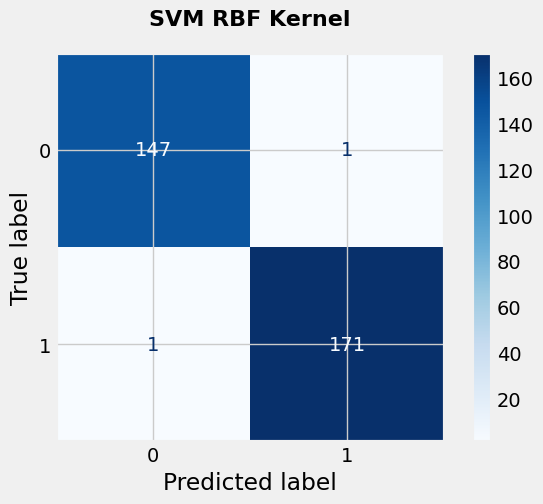

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Print the classification report
print(classification_report(y_test, pred_test))
print('----------------------------------')

# Set the plotting style
plt.style.use('fivethirtyeight')

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred_test, labels=svm_classifier.classes_)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add title and show plot
plt.title('SVM RBF Kernel', fontsize=16, fontweight='bold', pad=20)
plt.show()


In [42]:
svm_classifier = SVC(kernel='poly', degree=1)
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  100.0
----------------------------------
Test accuracy:  100.0
----------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


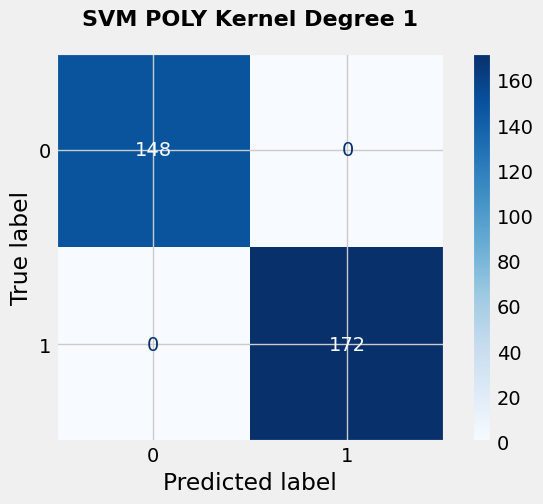

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Print the classification report
print(classification_report(y_test, pred_test))
print('----------------------------------')

# Set the plotting style
plt.style.use('fivethirtyeight')

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred_test, labels=svm_classifier.classes_)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add title and show plot
plt.title('SVM POLY Kernel Degree 1', fontsize=16, fontweight='bold', pad=20)
plt.show()


In [45]:
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(x_train, y_train)
pred_test = svm_classifier.predict(x_test)
pred_train=svm_classifier.predict(x_train)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  99.29467084639498
----------------------------------
Test accuracy:  99.6875
----------------------------------


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       172

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------


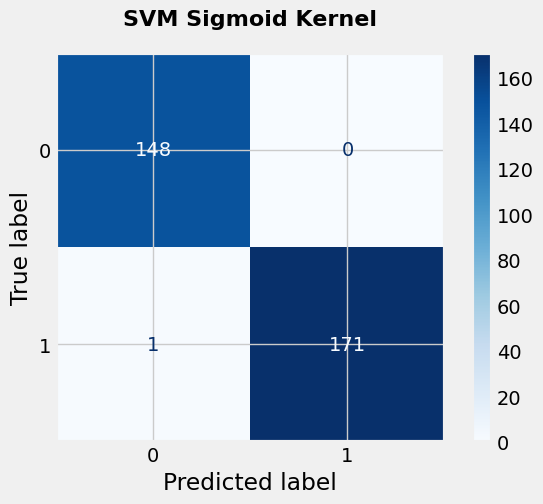

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Print the classification report
print(classification_report(y_test, pred_test))
print('----------------------------------')

# Set the plotting style
plt.style.use('fivethirtyeight')

# Compute the confusion matrix
cm = confusion_matrix(y_test, pred_test, labels=svm_classifier.classes_)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')

# Add title and show plot
plt.title('SVM Sigmoid Kernel', fontsize=16, fontweight='bold', pad=20)
plt.show()
